In [1]:
# Description: This code compares the chosen stock's cumulative returns with the nifty benchmark to find the beta parameter of the stock
# further, it calculates the expected returns of the stock using the CAPM model assuming expected market returns as 8% and risk free rate 
# as 6%.
# Note: this code is generalised such that any stock can be taken in as chosen stock. All the instances say 'stock' instead of a specific
# stock name. Here INFY(NSE) is taken as an example

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Choose stock

chosen_stock = 'INFY.NS'

In [4]:
# Getting stock and nifty data

stock = yf.download(chosen_stock, interval='1d', period='1y')
stock.reset_index(inplace=True)
nifty = yf.download('^NSEI', interval='1d', period='1y')
nifty.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-15,1475.000000,1475.199951,1429.050049,1432.800049,1379.948730,12784100
1,2022-09-16,1425.000000,1425.000000,1368.349976,1377.050049,1326.255127,20464045
2,2022-09-19,1392.000000,1406.000000,1380.599976,1390.300049,1339.016357,6595241
3,2022-09-20,1407.949951,1413.550049,1385.099976,1388.550049,1337.331055,7219797
4,2022-09-21,1379.900024,1388.800049,1368.400024,1377.250000,1326.447754,7917054
...,...,...,...,...,...,...,...
245,2023-09-11,1469.599976,1478.050049,1464.500000,1476.449951,1476.449951,4182226
246,2023-09-12,1482.500000,1504.000000,1477.099976,1501.099976,1501.099976,6793161
247,2023-09-13,1505.000000,1505.000000,1488.650024,1498.349976,1498.349976,4804686
248,2023-09-14,1505.000000,1512.550049,1499.150024,1506.949951,1506.949951,6444213


In [6]:
nifty

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-15,18046.349609,18096.150391,17861.500000,17877.400391,17877.400391,289600
1,2022-09-16,17796.800781,17820.050781,17497.250000,17530.849609,17530.849609,468500
2,2022-09-19,17540.650391,17667.199219,17429.699219,17622.250000,17622.250000,258300
3,2022-09-20,17770.400391,17919.300781,17744.400391,17816.250000,17816.250000,263100
4,2022-09-21,17766.349609,17838.699219,17663.599609,17718.349609,17718.349609,245500
...,...,...,...,...,...,...,...
245,2023-09-11,19890.000000,20008.150391,19865.349609,19996.349609,19996.349609,248800
246,2023-09-12,20110.150391,20110.349609,19914.650391,19993.199219,19993.199219,328100
247,2023-09-13,19989.500000,20096.900391,19944.099609,20070.000000,20070.000000,251400
248,2023-09-14,20127.949219,20167.650391,20043.449219,20103.099609,20103.099609,275100


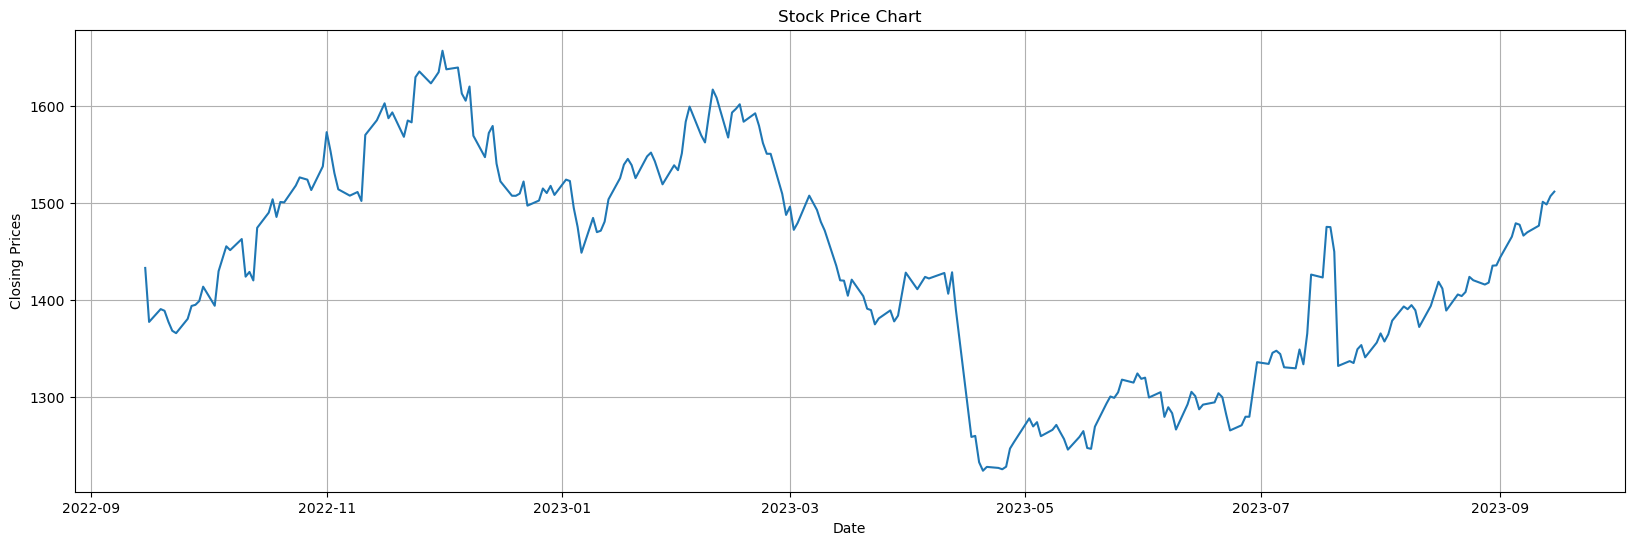

In [7]:
# Plotting stock price chart

plt.figure(figsize=(20,6))
plt.plot(stock['Date'], stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Stock Price Chart')
plt.grid(True)

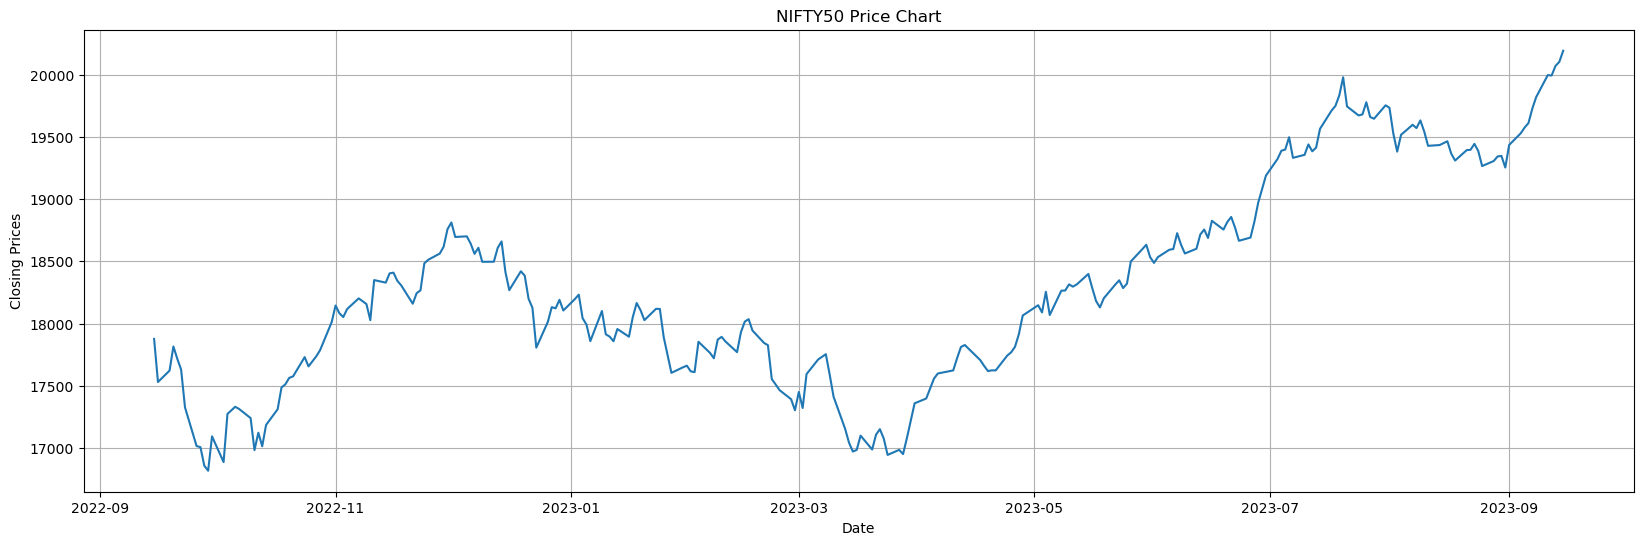

In [8]:
# plotting NIFTY50 price chart

plt.figure(figsize=(20,6))
plt.plot(nifty['Date'], nifty['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('NIFTY50 Price Chart')
plt.grid(True)

In [9]:
# Calculating cumulative returns for stock and nifty for comparison

stock['Daily_Returns'] = stock['Close'].pct_change()
nifty['Daily_Returns'] = nifty['Close'].pct_change()

stock['Cumulative_Returns'] = (1 + stock['Daily_Returns']).cumprod()
nifty['Cumulative_Returns'] = (1 + nifty['Daily_Returns']).cumprod()

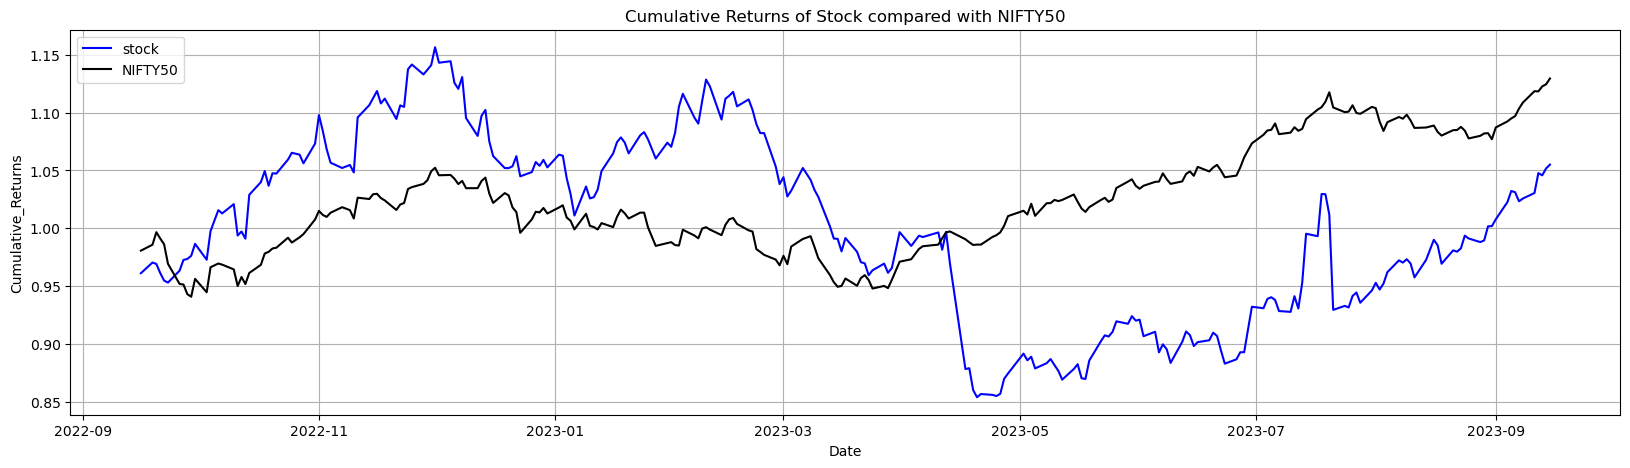

In [10]:
# Comparing cumulative returns of stock and nifty

plt.figure(figsize=(20,5))
plt.plot(stock['Date'], stock['Cumulative_Returns'], label='stock', color='blue')
plt.plot(nifty['Date'], nifty['Cumulative_Returns'], label='NIFTY50', color='black')
plt.xlabel('Date')
plt.ylabel('Cumulative_Returns')
plt.title('Cumulative Returns of Stock compared with NIFTY50')
plt.grid(True)
plt.legend()

In [11]:
# Linear Regression to get CAPM parameters

stock_returns = stock['Daily_Returns'].dropna().values
nifty_returns = nifty['Daily_Returns'].dropna().values

X = np.vstack([nifty_returns, np.ones(len(nifty_returns))]).T
y = stock_returns

beta, alpha = np.linalg.lstsq(X, y, rcond=None)[0]

In [12]:
# Getting r squared value

y_pred = X.dot([beta, alpha])
y_mean = np.mean(y)
r_value = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - y_mean) ** 2))

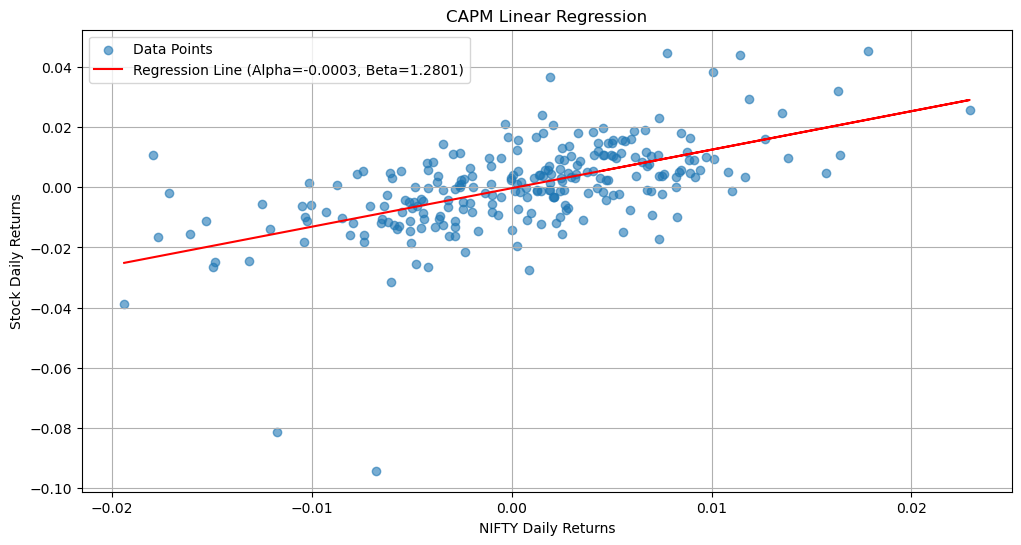

In [13]:
# Plotting linear regression

plt.figure(figsize=(12, 6))
plt.scatter(nifty_returns, stock_returns, label='Data Points', alpha=0.6)
plt.plot(nifty_returns, y_pred, color='red', label=f'Regression Line (Alpha={alpha:.4f}, Beta={beta:.4f})')
plt.title('CAPM Linear Regression')
plt.xlabel('NIFTY Daily Returns')
plt.ylabel('Stock Daily Returns')
plt.legend()
plt.grid(True)

In [14]:
beta

1.2801319005810474

In [15]:
alpha

-0.00032549038809779566

In [16]:
r_value

0.3291972450313353

In [17]:
# expected Returns of INFY using CAPM formula: 
# Expected Returns = Rf + beta * (Expected Market Returns - Rf)   
# Rf = risk free rate (assuming 6%)
# assuming Expected market returns to be 8%

rf = 0.06
rm = 0.08
re = rf + beta * (rm-rf)
returns_percent = re *100

In [18]:
re

0.08560263801162095

In [19]:
returns_percent

8.560263801162096